### Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

### Q1. Pandas version

In [2]:
pd.__version__

'2.2.2'

### Getting the data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
df.head(3)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.0


### Q2. Records count

How many records are in the dataset?

In [4]:
df.shape[0]

2160

### Q3. Laptop brands
How many laptop brands are presented in the dataset?

In [5]:
df['Brand'].unique().shape[0]

27

### Q4. Missing values
How many columns in the dataset have missing values?

In [6]:
na_cols = df.columns[df.isna().apply(lambda x: any(x), axis=0)].tolist()
print(len(na_cols))
na_cols

3


['Storage type', 'GPU', 'Screen']

### Q5. Maximum final price
What's the maximum final price of Dell notebooks in the dataset?

In [7]:
df[df['Brand'] == 'Dell']['Final Price'].max()

3936.0

### Q6. Median value of Screen

1. Find the median value of Screen column in the dataset.
2. Next, calculate the most frequent value of the same Screen column.
3. Use fillna method to fill the missing values in Screen column with the most frequent value from the previous step.
4. Now, calculate the median value of Screen once again.

Has it changed?

<Axes: xlabel='Screen', ylabel='Count'>

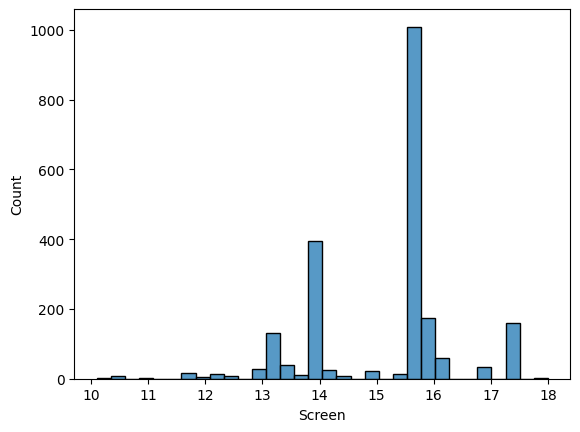

In [8]:
sns.histplot(df.Screen)

In [9]:
df['Screen'].isna().sum()

4

In [10]:
df['Screen'].median()

15.6

In [11]:
mode_screen = df['Screen'].mode()[0]
mode_screen

15.6

In [12]:
df.fillna(value={'Screen':mode_screen}, inplace=True)

In [13]:
df['Screen'].median() # Median has not changed

15.6

In [14]:
df['Screen'].isna().sum()

0

### Q7. Sum of weights

1. Select all the "Innjoo" laptops from the dataset.
2. Select only columns RAM, Storage, Screen.
3. Get the underlying NumPy array. Let's call it X.
4. Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.
5. Compute the inverse of XTX.
6. Create an array y with values [1100, 1300, 800, 900, 1000, 1100].
7. Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
8. What's the sum of all the elements of the result?


In [15]:
cols = ['RAM', 'Storage', 'Screen']
raws = df['Brand'] == 'Innjoo'
df.loc[raws, cols]

,RAM,Storage,Screen
1478,8,256,15.6
1479,8,512,15.6
1480,4,64,14.1
1481,6,64,14.1
1482,6,128,14.1
1483,6,128,14.1


In [16]:
X = df.loc[raws, cols].to_numpy()
XTX = X.T @ X
y = [1100, 1300, 800, 900, 1000, 1100]
w = (np.linalg.pinv(XTX) @ X.T) @ y
sum(w)

91.2998806299771